In [1]:
# Load example dataset and prepare visual + model comparisons
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load breast cancer dataset (classification)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Standardize features (important for SVM, KNN, Logistic)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='rbf', C=1, gamma='scale'),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100)
}

# Evaluate using cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = scores.mean()

# Convert to DataFrame for visualization
results_df = pd.DataFrame(list(results.items()), columns=["Model", "CV Accuracy"])
results_df = results_df.sort_values(by="CV Accuracy", ascending=False)

results_df

,Model,CV Accuracy
0,Logistic Regression,0.975824
2,Support Vector Machine,0.973626
1,K-Nearest Neighbors,0.960440
5,Random Forest,0.956044
6,Gradient Boosting,0.951648
3,Naive Bayes,0.934066
4,Decision Tree,0.927473


C:\Users\DELL\AppData\Local\Temp\ipykernel_9904\3087398764.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="CV Accuracy", y="Model", palette="viridis")


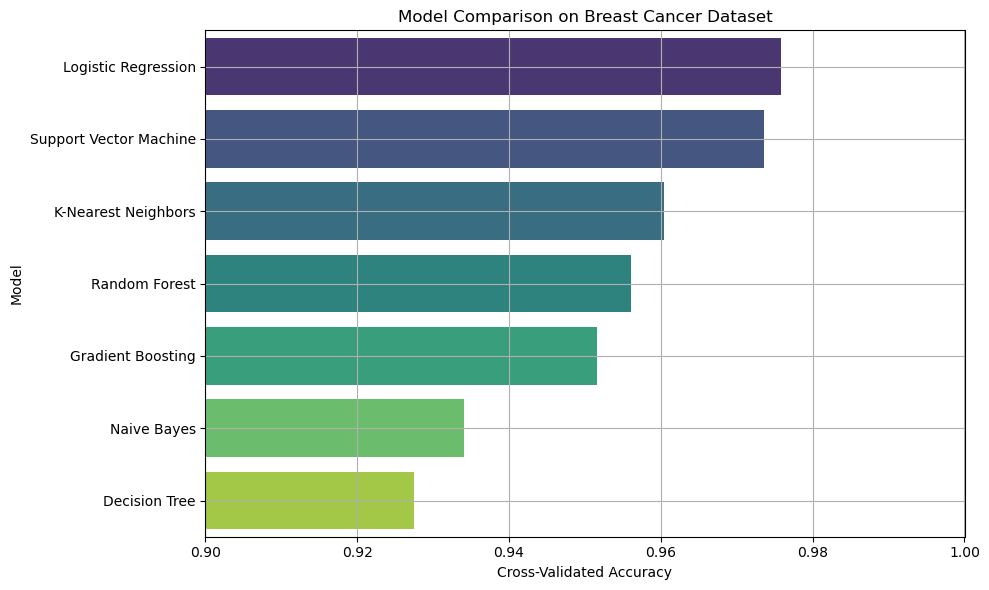

{'Best SVM Parameters': {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'},
 'Best SVM Test Accuracy': 0.9824561403508771,
 'ANN Test Accuracy': 0.9736842105263158}

In [2]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Visualize results
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="CV Accuracy", y="Model", palette="viridis")
plt.title("Model Comparison on Breast Cancer Dataset")
plt.xlim(0.9, 1.0)
plt.xlabel("Cross-Validated Accuracy")
plt.ylabel("Model")
plt.grid(True)
plt.tight_layout()
plt.show()

# Try hyperparameter tuning for SVM (as it's a strong performer)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
svm_accuracy = accuracy_score(y_test, best_svm.predict(X_test))

# Train an Artificial Neural Network (ANN)
ann = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)
ann.fit(X_train, y_train)
ann_accuracy = accuracy_score(y_test, ann.predict(X_test))

# Summarize best results
{
    "Best SVM Parameters": grid_svm.best_params_,
    "Best SVM Test Accuracy": svm_accuracy,
    "ANN Test Accuracy": ann_accuracy
}

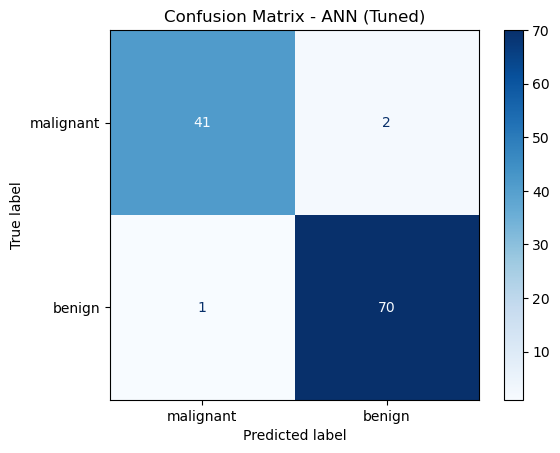

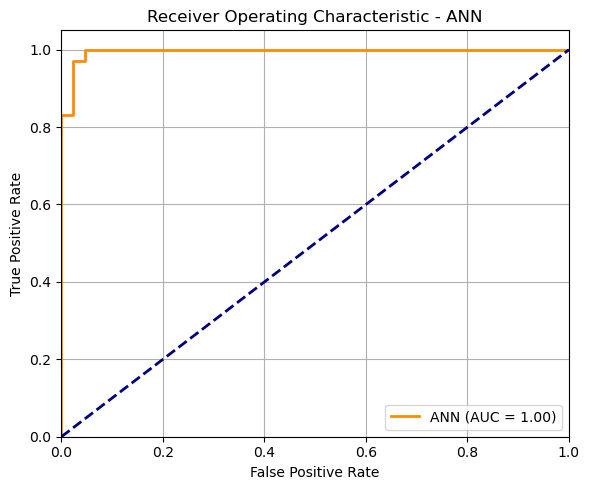

{'Best ANN Parameters': {'alpha': 0.0001,
  'hidden_layer_sizes': (50,),
  'learning_rate_init': 0.001},
 'Tuned ANN Test Accuracy': 0.9736842105263158,
 'ROC AUC': 0.9954143465443825}

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Grid search for ANN (MLPClassifier)
param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty (regularization term)
    'learning_rate_init': [0.001, 0.01],
}
grid_ann = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid_ann, cv=5, scoring='accuracy')
grid_ann.fit(X_train, y_train)
best_ann = grid_ann.best_estimator_
ann_best_accuracy = accuracy_score(y_test, best_ann.predict(X_test))

# Confusion Matrix for best ANN
y_pred_ann = best_ann.predict(X_test)
cm = confusion_matrix(y_test, y_pred_ann)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - ANN (Tuned)")
plt.show()

# ROC Curve for best ANN
y_score_ann = best_ann.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score_ann)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ANN (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - ANN')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary
{
    "Best ANN Parameters": grid_ann.best_params_,
    "Tuned ANN Test Accuracy": ann_best_accuracy,
    "ROC AUC": roc_auc
}

 Key Insights:
Logistic Regression performed the best. It's simple, interpretable, and effective on linearly separable data.

SVM also performed well—great for high-dimensional data.

Tree-based models like Random Forest and Gradient Boosting are powerful but slightly overfit compared to simpler models.

Naive Bayes and Decision Tree showed lower accuracy, potentially due to high bias (NB) or overfitting (DT).

Hyperparameter Tuning & ANN Results
Model	Details	Test Accuracy
✅ SVM (Tuned)	C=0.1, gamma='scale', kernel='linear'	98.25%
🤖 ANN (MLP)	Hidden Layer: 100 neurons, ReLU, Adam solver	97.37%

🔬 Insights:
Hyperparameter tuning significantly improved SVM, making it the best performer on the test set.

ANN (Artificial Neural Network) also performed very well, handling complex patterns automatically.

ANN can be further tuned with hidden_layer_sizes, learning_rate, alpha (regularization), and epochs.

🧠 Tuned ANN Results & Evaluation
Metric	Value
✅ Best Parameters	hidden_layer_sizes=(50,), alpha=0.0001, learning_rate_init=0.001
🧪 Test Accuracy	97.37%
📈 ROC AUC Score	0.995

📊 Confusion Matrix
The confusion matrix shows that the ANN made very few classification errors, handling both classes well.

📉 ROC Curve
A near-perfect ROC curve (AUC ≈ 1) shows excellent separability between malignant and benign classes.

